##### Copyright 2019 The TensorFlow Probability Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Probability 둘러보기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/probability/examples/A_Tour_of_TensorFlow_Probability"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/probability/examples/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/probability/examples/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">    GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/probability/examples/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

이 Colab에서는 TensorFlow Probability의 몇 가지 기본 기능을 살펴보겠습니다. 

### 종속성과 전제 조건


In [ ]:
#@title Import { display-mode: "form" }


from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

In [ ]:
#@title Utils { display-mode: "form" }
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

## 개요

- TensorFlow
- TensorFlow Probability
    - 분포
    - Bijectors
    - 마르코프 연쇄 몬테카를로(MCMC)
    - 그 외 다수

## 서문: TensorFlow

TensorFlow는 과학 컴퓨팅 라이브러리입니다.

---

TensorFlow는 다음을 지원합니다.

- 많은 수학적 연산
- 효율적인 벡터화 계산
- 쉬운 하드웨어 가속
- 자동 미분

### 벡터화

- 벡터화를 통해 계산이 빨라집니다!
- 또한 이는 형상에 대한 많은 고찰이 있었음을 의미합니다.

In [ ]:
mats = tf.random.uniform(shape=[1000, 10, 10])
vecs = tf.random.uniform(shape=[1000, 10, 1])

def for_loop_solve():
  return np.array(
    [tf.linalg.solve(mats[i, ...], vecs[i, ...]) for i in range(1000)])

def vectorized_solve():
  return tf.linalg.solve(mats, vecs)

# Vectorization for the win!
%timeit for_loop_solve()
%timeit vectorized_solve()

1 loops, best of 3: 2 s per loop
1000 loops, best of 3: 653 µs per loop


### 하드웨어 가속

In [ ]:
# Code can run seamlessly on a GPU, just change Colab runtime type
# in the 'Runtime' menu.
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

Using a CPU


### 자동 미분

In [ ]:
a = tf.constant(np.pi)
b = tf.constant(np.e)
with tf.GradientTape() as tape:
  tape.watch([a, b])
  c = .5 * (a**2 + b**2)
grads = tape.gradient(c, [a, b])
print(grads[0])
print(grads[1])

tf.Tensor(3.1415927, shape=(), dtype=float32)
tf.Tensor(2.7182817, shape=(), dtype=float32)


## TensorFlow Probability

*TensorFlow Probability는 TensorFlow에서 확률적 추론 및 통계 분석을 위한 라이브러리입니다.*

낮은 수준 모듈러 구성 요소의 구성을 통해 *모델링*, *추론* 및 *비평*이 지원됩니다.

### 낮은 수준의 구성 요소

- 분포
- Bijectors

### 높은 수준의 구문

- 마르코프 연쇄 몬테카를로
- 확률적 레이어
- 구조적 시계열
- 일반화된 선형 모델
- 옵티마이저

## 분포

`tfp.distributions.Distribution`은 `sample` 및 `log_prob`의 두 가지 핵심 메서드가 있는 클래스입니다.

TFP에는 Distributions가 많이 있습니다.

In [ ]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchReshape, Bates, Bernoulli, Beta, BetaBinomial, Binomial
Blockwise, Categorical, Cauchy, Chi, Chi2, CholeskyLKJ, ContinuousBernoulli
Deterministic, Dirichlet, DirichletMultinomial, Distribution, DoublesidedMaxwell
Empirical, ExpGamma, ExpRelaxedOneHotCategorical, Exponential, FiniteDiscrete
Gamma, GammaGamma, GaussianProcess, GaussianProcessRegressionModel
GeneralizedNormal, GeneralizedPareto, Geometric, Gumbel, HalfCauchy, HalfNormal
HalfStudentT, HiddenMarkovModel, Horseshoe, Independent, InverseGamma
InverseGaussian, JohnsonSU, JointDistribution, JointDistributionCoroutine
JointDistributionCoroutineAutoBatched, JointDistributionNamed
JointDistributionNamedAutoBatched, JointDistributionSequential
JointDistributionSequentialAutoBatched, Kumaraswamy, LKJ, Laplace
LinearGaussianStateSpaceModel, LogLogistic, LogNormal, Logistic, LogitNormal
Mixture, MixtureSameFamily, Moyal, Multinomial, MultivariateNormalDiag
MultivariateNormalDiagPlusLowRank, MultivariateNormalFullC

### 단순 스칼라 변량 `Distribution`

In [ ]:
# A standard normal
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


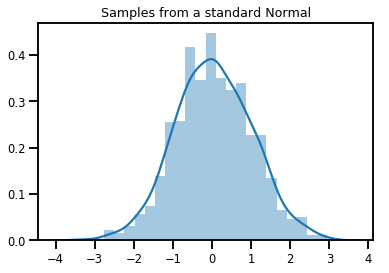

In [ ]:
# Plot 1000 samples from a standard normal
samples = normal.sample(1000)
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()

In [ ]:
# Compute the log_prob of a point in the event space of `normal`
normal.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [ ]:
# Compute the log_prob of a few points
normal.log_prob([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4189385, -0.9189385, -1.4189385], dtype=float32)>

### 분포와 형상

Numpy `ndarrays` 및 TensorFlow `Tensors`에는 *형상*이 있습니다.

TensorFlow Probability `Distributions`에는 *형상 의미 체계*가 있습니다. 모든 것에 같은 메모리 청크(`Tensor`/`ndarray`)가 사용되더라도 형상을 의미적으로 구별되는 조각으로 분할합니다.

- **배치 형상**은 고유한 매개변수가 있는 <code>Distribution</code>의 <em>모음</em>을 나타냅니다.
- **이벤트 형상**은 <code>Distribution</code>에서 <em>샘플</em>의 형상을 나타냅니다.

항상 배치 형상을 '왼쪽'에 배치하고 이벤트 형상을 '오른쪽'에 배치합니다.

### 스칼라 변량 <code>Distributions</code>의 <em>배치</em>

배치는 '벡터화된' 분포와 유사합니다. 계산이 병렬로 발생하는 독립 인스턴스입니다.

In [ ]:
# Create a batch of 3 normals, and plot 1000 samples from each
normals = tfd.Normal([-2.5, 0., 2.5], 1.)  # The scale parameter broadacasts!
print("Batch shape:", normals.batch_shape)
print("Event shape:", normals.event_shape)

Batch shape: (3,)
Event shape: ()


In [ ]:
# Samples' shapes go on the left!
samples = normals.sample(1000)
print("Shape of samples:", samples.shape)

Shape of samples: (1000, 3)


In [ ]:
# Sample shapes can themselves be more complicated
print("Shape of samples:", normals.sample([10, 10, 10]).shape)

Shape of samples: (10, 10, 10, 3)


In [ ]:
# A batch of normals gives a batch of log_probs.
print(normals.log_prob([-2.5, 0., 2.5]))

tf.Tensor([-0.9189385 -0.9189385 -0.9189385], shape=(3,), dtype=float32)


In [ ]:
# The computation broadcasts, so a batch of normals applied to a scalar
# also gives a batch of log_probs.
print(normals.log_prob(0.))

tf.Tensor([-4.0439386 -0.9189385 -4.0439386], shape=(3,), dtype=float32)


In [ ]:
# Normal numpy-like broadcasting rules apply!
xs = np.linspace(-6, 6, 200)
try:
  normals.log_prob(xs)
except Exception as e:
  print("TFP error:", e.message)

TFP error: Incompatible shapes: [200] vs. [3] [Op:SquaredDifference]


In [ ]:
# That fails for the same reason this does:
try:
  np.zeros(200) + np.zeros(3)
except Exception as e:
  print("Numpy error:", e)

Numpy error: operands could not be broadcast together with shapes (200,) (3,) 


In [ ]:
# But this would work:
a = np.zeros([200, 1]) + np.zeros(3)
print("Broadcast shape:", a.shape)

Broadcast shape: (200, 3)


In [ ]:
# And so will this!
xs = np.linspace(-6, 6, 200)[..., np.newaxis]
# => shape = [200, 1]

lps = normals.log_prob(xs)
print("Broadcast log_prob shape:", lps.shape)

Broadcast log_prob shape: (200, 3)


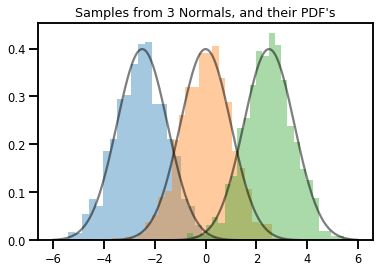

In [ ]:
# Summarizing visually
for i in range(3):
  sns.distplot(samples[:, i], kde=False, norm_hist=True)
plt.plot(np.tile(xs, 3), normals.prob(xs), c='k', alpha=.5)
plt.title("Samples from 3 Normals, and their PDF's")
plt.show()

### 벡터 변량 `Distribution`

In [ ]:
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag = [1., 1.])
print("Batch shape:", mvn.batch_shape)
print("Event shape:", mvn.event_shape)

Batch shape: ()
Event shape: (2,)


In [ ]:
samples = mvn.sample(1000)
print("Samples shape:", samples.shape)

Samples shape: (1000, 2)


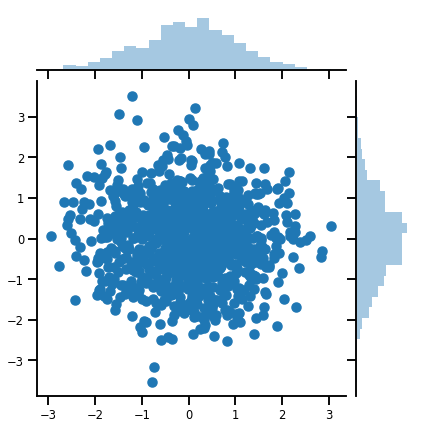

In [ ]:
g = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
plt.show()

### 행렬 변량 `Distribution`

In [ ]:
lkj = tfd.LKJ(dimension=10, concentration=[1.5, 3.0])
print("Batch shape: ", lkj.batch_shape)
print("Event shape: ", lkj.event_shape)

Batch shape:  (2,)
Event shape:  (10, 10)


In [ ]:
samples = lkj.sample()
print("Samples shape: ", samples.shape)

Samples shape:  (2, 10, 10)


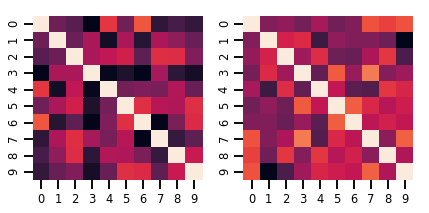

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
sns.heatmap(samples[0, ...], ax=axes[0], cbar=False)
sns.heatmap(samples[1, ...], ax=axes[1], cbar=False)
fig.tight_layout()
plt.show()

### 가우시안 프로세스

In [ ]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
xs = np.linspace(-5., 5., 200).reshape([-1, 1])
gp = tfd.GaussianProcess(kernel, index_points=xs)
print("Batch shape:", gp.batch_shape)
print("Event shape:", gp.event_shape)

Batch shape: ()
Event shape: (200,)


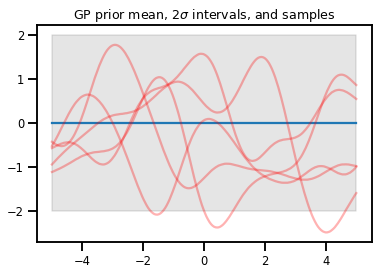

In [ ]:
upper, lower = gp.mean() + [2 * gp.stddev(), -2 * gp.stddev()]
plt.plot(xs, gp.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(5):
  plt.plot(xs, gp.sample(), c='r', alpha=.3)
plt.title(r"GP prior mean, $2\sigma$ intervals, and samples")
plt.show()

#    *** Bonus question ***
# Why do so many of these functions lie outside the 95% intervals?

### 가우시안 프로세스 회귀

In [ ]:
# Suppose we have some observed data
obs_x = [[-3.], [0.], [2.]]  # Shape 3x1 (3 1-D vectors)
obs_y = [3., -2., 2.]        # Shape 3   (3 scalars)

gprm = tfd.GaussianProcessRegressionModel(kernel, xs, obs_x, obs_y)

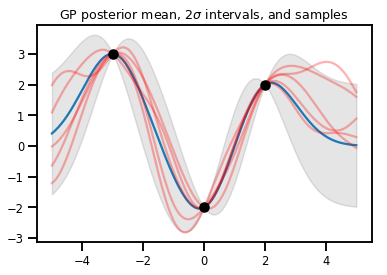

In [ ]:
upper, lower = gprm.mean() + [2 * gprm.stddev(), -2 * gprm.stddev()]
plt.plot(xs, gprm.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(5):
  plt.plot(xs, gprm.sample(), c='r', alpha=.3)
plt.scatter(obs_x, obs_y, c='k', zorder=3)
plt.title(r"GP posterior mean, $2\sigma$ intervals, and samples")
plt.show()

## Bijectors

Bijector는 (대부분) 가역적이고 매끄러운 함수를 나타냅니다. 분포를 변환하는 데 사용할 수 있으며 샘플을 사용하고 log_probs를 계산하는 기능을 보존할 수 있습니다. 이들 Bijector는 `tfp.bijectors` 모듈에 있을 수 있습니다.

각 bijector는 최소 3가지 메서드를 구현합니다.

- `forward`
- `inverse`
- (적어도) `forward_log_det_jacobian` 및 `inverse_log_det_jacobian` 중 하나.

위의 성분을 사용하여 분포를 변환하고 결과에서 샘플 및 log_probs를 얻을 수 있습니다.

### 수학식에서는 다소 엉성하게 나타납니다.

- $X$는 pdf $p(x)$를 사용하는 확률 변수입니다.
- $g$는 $X$의 공간에 대한 매끄럽고 가역적인 함수입니다.
- $Y = g(X)$는 변환된 새 확률 변수입니다.
- $p(Y=y) = p(X=g^{-1}(y)) \cdot |\nabla g^{-1}(y)|$

### 캐싱

Bijector는 또한 순방향 및 역방향 계산과 log-det-Jacobian을 캐시하여 잠재적으로 매우 비싼 연산을 반복하지 않을 수 있습니다.

In [ ]:
print_subclasses_from_module(tfp.bijectors, tfp.bijectors.Bijector)

AbsoluteValue, Affine, AffineLinearOperator, AffineScalar, BatchNormalization
Bijector, Blockwise, Chain, CholeskyOuterProduct, CholeskyToInvCholesky
CorrelationCholesky, Cumsum, DiscreteCosineTransform, Exp, Expm1, FFJORD
FillScaleTriL, FillTriangular, FrechetCDF, GeneralizedExtremeValueCDF
GeneralizedPareto, GompertzCDF, GumbelCDF, Identity, Inline, Invert
IteratedSigmoidCentered, KumaraswamyCDF, LambertWTail, Log, Log1p
MaskedAutoregressiveFlow, MatrixInverseTriL, MatvecLU, MoyalCDF, NormalCDF
Ordered, Pad, Permute, PowerTransform, RationalQuadraticSpline, RayleighCDF
RealNVP, Reciprocal, Reshape, Scale, ScaleMatvecDiag, ScaleMatvecLU
ScaleMatvecLinearOperator, ScaleMatvecTriL, ScaleTriL, Shift, ShiftedGompertzCDF
Sigmoid, Sinh, SinhArcsinh, SoftClip, Softfloor, SoftmaxCentered, Softplus
Softsign, Split, Square, Tanh, TransformDiagonal, Transpose, WeibullCDF


### 단순 `Bijector`

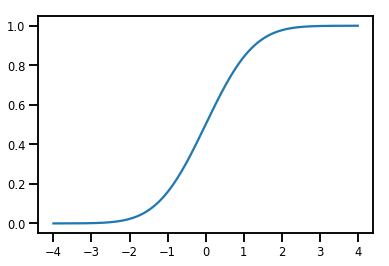

In [ ]:
normal_cdf = tfp.bijectors.NormalCDF()
xs = np.linspace(-4., 4., 200)
plt.plot(xs, normal_cdf.forward(xs))
plt.show()

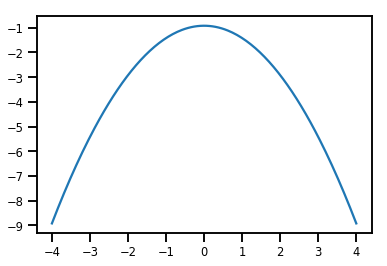

In [ ]:
plt.plot(xs, normal_cdf.forward_log_det_jacobian(xs, event_ndims=0))
plt.show()

### `Distribution`을 변환하는 `Bijector`

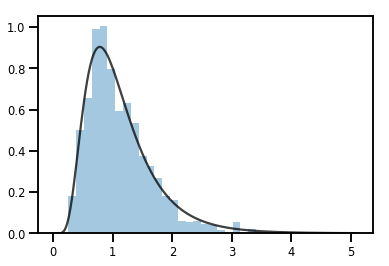

In [ ]:
exp_bijector = tfp.bijectors.Exp()
log_normal = exp_bijector(tfd.Normal(0., .5))

samples = log_normal.sample(1000)
xs = np.linspace(1e-10, np.max(samples), 200)
sns.distplot(samples, norm_hist=True, kde=False)
plt.plot(xs, log_normal.prob(xs), c='k', alpha=.75)
plt.show()

### `Bijectors` 일괄 처리하기

In [ ]:
# Create a batch of bijectors of shape [3,]
softplus = tfp.bijectors.Softplus(
  hinge_softness=[1., .5, .1])
print("Hinge softness shape:", softplus.hinge_softness.shape)

Hinge softness shape: (3,)


In [ ]:
# For broadcasting, we want this to be shape [200, 1]
xs = np.linspace(-4., 4., 200)[..., np.newaxis]
ys = softplus.forward(xs)
print("Forward shape:", ys.shape)

Forward shape: (200, 3)


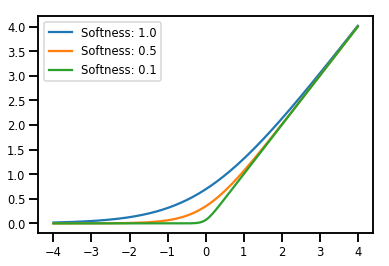

In [ ]:
# Visualization
lines = plt.plot(np.tile(xs, 3), ys)
for line, hs in zip(lines, softplus.hinge_softness):
  line.set_label("Softness: %1.1f" % hs)
plt.legend()
plt.show()

### 캐싱

In [ ]:
# This bijector represents a matrix outer product on the forward pass,
# and a cholesky decomposition on the inverse pass. The latter costs O(N^3)!
bij = tfb.CholeskyOuterProduct()

size = 2500
# Make a big, lower-triangular matrix
big_lower_triangular = tf.eye(size)
# Squaring it gives us a positive-definite matrix
big_positive_definite = bij.forward(big_lower_triangular)

# Caching for the win!
%timeit bij.inverse(big_positive_definite)
%timeit tf.linalg.cholesky(big_positive_definite)

10000 loops, best of 3: 114 µs per loop
1 loops, best of 3: 208 ms per loop


## 마르코프 연쇄 몬테카를로(MCMC)

TFP는 해밀턴 몬테카를로(Hamiltonian Monte Carlo)를 포함한 일부 표준 마르코프 연쇄 몬테카를로 알고리즘에 대한 내장 지원을 제공합니다.

### 데이터세트를 생성합니다.

In [ ]:
# Generate some data
def f(x, w):
  # Pad x with 1's so we can add bias via matmul
  x = tf.pad(x, [[1, 0], [0, 0]], constant_values=1)
  linop = tf.linalg.LinearOperatorFullMatrix(w[..., np.newaxis])
  result = linop.matmul(x, adjoint=True)
  return result[..., 0, :]

num_features = 2
num_examples = 50
noise_scale = .5
true_w = np.array([-1., 2., 3.])

xs = np.random.uniform(-1., 1., [num_features, num_examples])
ys = f(xs, true_w) + np.random.normal(0., noise_scale, size=num_examples)

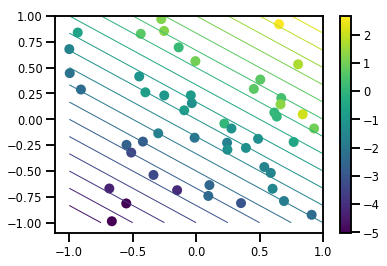

In [ ]:
# Visualize the data set
plt.scatter(*xs, c=ys, s=100, linewidths=0)

grid = np.meshgrid(*([np.linspace(-1, 1, 100)] * 2))
xs_grid = np.stack(grid, axis=0)
fs_grid = f(xs_grid.reshape([num_features, -1]), true_w)
fs_grid = np.reshape(fs_grid, [100, 100])
plt.colorbar()
plt.contour(xs_grid[0, ...], xs_grid[1, ...], fs_grid, 20, linewidths=1)
plt.show()

### 결합 로그 확률 함수를 정의합니다.

unnormalized_posterior는 데이터를 둘러싸고 결합 log_prob의 [부분적 적용](https://en.wikipedia.org/wiki/Partial_application)을 형성한 결과입니다.

In [ ]:
# Define the joint_log_prob function, and our unnormalized posterior.
def joint_log_prob(w, x, y):
  # Our model in maths is
  #   w ~ MVN([0, 0, 0], diag([1, 1, 1]))
  #   y_i ~ Normal(w @ x_i, noise_scale),  i=1..N

  rv_w = tfd.MultivariateNormalDiag(
    loc=np.zeros(num_features + 1),
    scale_diag=np.ones(num_features + 1))

  rv_y = tfd.Normal(f(x, w), noise_scale)
  return (rv_w.log_prob(w) +
          tf.reduce_sum(rv_y.log_prob(y), axis=-1))

In [ ]:
# Create our unnormalized target density by currying x and y from the joint.
def unnormalized_posterior(w):
  return joint_log_prob(w, xs, ys)

### HMC TransitionKernel을 빌드하고 sample_chain을 호출합니다.

In [ ]:
# Create an HMC TransitionKernel
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
  target_log_prob_fn=unnormalized_posterior,
  step_size=np.float64(.1),
  num_leapfrog_steps=2)

In [ ]:
# We wrap sample_chain in tf.function, telling TF to precompile a reusable
# computation graph, which will dramatically improve performance.
@tf.function
def run_chain(initial_state, num_results=1000, num_burnin_steps=500):
  return tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_state,
    kernel=hmc_kernel,
    trace_fn=lambda current_state, kernel_results: kernel_results)

In [ ]:
initial_state = np.zeros(num_features + 1)
samples, kernel_results = run_chain(initial_state)
print("Acceptance rate:", kernel_results.is_accepted.numpy().mean())

Acceptance rate: 0.915


*별로 좋지 않습니다. 채택률이 .65에 가까워지길 바랍니다.*

([Optimal Scaling for Various Metropolis-Hastings Algorithms](https://projecteuclid.org/euclid.ss/1015346320), Roberts & Rosenthal, 2001 참조)


### 적응형 스텝 크기

HMC TransitionKernel을 `SimpleStepSizeAdaptation` 'meta-kernel'로 래핑할 수 있으며, 이는 burnin 중에 HMC 스텝 크기를 조정하기 위해 일부 로직(다소 단순한 추론)을 적용합니다. burnin의 80%를 스텝 크기를 조정하는데 할당하고 나머지 20%는 혼합에 사용합니다.

In [ ]:
# Apply a simple step size adaptation during burnin
@tf.function
def run_chain(initial_state, num_results=1000, num_burnin_steps=500):
  adaptive_kernel = tfp.mcmc.SimpleStepSizeAdaptation(
      hmc_kernel,
      num_adaptation_steps=int(.8 * num_burnin_steps),
      target_accept_prob=np.float64(.65))

  return tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_state,
    kernel=adaptive_kernel,
    trace_fn=lambda cs, kr: kr)

In [ ]:
samples, kernel_results = run_chain(
  initial_state=np.zeros(num_features+1))
print("Acceptance rate:", kernel_results.inner_results.is_accepted.numpy().mean())

Acceptance rate: 0.634


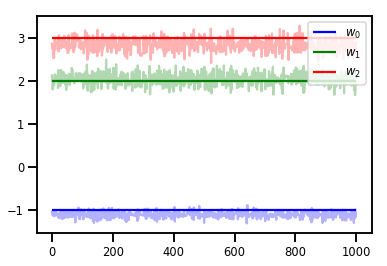

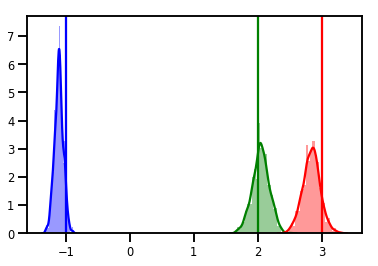

In [ ]:
# Trace plots
colors = ['b', 'g', 'r']
for i in range(3):
  plt.plot(samples[:, i], c=colors[i], alpha=.3)
  plt.hlines(true_w[i], 0, 1000, zorder=4, color=colors[i], label="$w_{}$".format(i))
plt.legend(loc='upper right')
plt.show()

# Histogram of samples
for i in range(3):
  sns.distplot(samples[:, i], color=colors[i])
ymax = plt.ylim()[1]
for i in range(3):
  plt.vlines(true_w[i], 0, ymax, color=colors[i])
plt.ylim(0, ymax)
plt.show()

### 진단

추적 플롯도 좋지만 진단은 더 좋습니다.

먼저 여러 chain을 실행해야 합니다. 여러 chain을 실행하는 일은 `initial_state` 텐서의 배치를 제공하는 것만큼 간단합니다.

In [ ]:
# Instead of a single set of initial w's, we create a batch of 8.
num_chains = 8
initial_state = np.zeros([num_chains, num_features + 1])

chains, kernel_results = run_chain(initial_state)

r_hat = tfp.mcmc.potential_scale_reduction(chains)
print("Acceptance rate:", kernel_results.inner_results.is_accepted.numpy().mean())
print("R-hat diagnostic (per latent variable):", r_hat.numpy())

Acceptance rate: 0.59175
R-hat diagnostic (per latent variable): [0.99998395 0.99932185 0.9997064 ]


### noise_scale 샘플링하기

In [ ]:
# Define the joint_log_prob function, and our unnormalized posterior.
def joint_log_prob(w, sigma, x, y):
  # Our model in maths is
  #   w ~ MVN([0, 0, 0], diag([1, 1, 1]))
  #   y_i ~ Normal(w @ x_i, noise_scale),  i=1..N

  rv_w = tfd.MultivariateNormalDiag(
    loc=np.zeros(num_features + 1),
    scale_diag=np.ones(num_features + 1))
  
  rv_sigma = tfd.LogNormal(np.float64(1.), np.float64(5.))

  rv_y = tfd.Normal(f(x, w), sigma[..., np.newaxis])
  return (rv_w.log_prob(w) +
          rv_sigma.log_prob(sigma) +
          tf.reduce_sum(rv_y.log_prob(y), axis=-1))

# Create our unnormalized target density by currying x and y from the joint.
def unnormalized_posterior(w, sigma):
  return joint_log_prob(w, sigma, xs, ys)


# Create an HMC TransitionKernel
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
  target_log_prob_fn=unnormalized_posterior,
  step_size=np.float64(.1),
  num_leapfrog_steps=4)



# Create a TransformedTransitionKernl
transformed_kernel = tfp.mcmc.TransformedTransitionKernel(
    inner_kernel=hmc_kernel,
    bijector=[tfb.Identity(),    # w
              tfb.Invert(tfb.Softplus())])   # sigma


# Apply a simple step size adaptation during burnin
@tf.function
def run_chain(initial_state, num_results=1000, num_burnin_steps=500):
  adaptive_kernel = tfp.mcmc.SimpleStepSizeAdaptation(
      transformed_kernel,
      num_adaptation_steps=int(.8 * num_burnin_steps),
      target_accept_prob=np.float64(.75))

  return tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_state,
    kernel=adaptive_kernel,
    seed=(0, 1),
    trace_fn=lambda cs, kr: kr)


# Instead of a single set of initial w's, we create a batch of 8.
num_chains = 8
initial_state = [np.zeros([num_chains, num_features + 1]),
                 .54 * np.ones([num_chains], dtype=np.float64)]

chains, kernel_results = run_chain(initial_state)

r_hat = tfp.mcmc.potential_scale_reduction(chains)
print("Acceptance rate:", kernel_results.inner_results.inner_results.is_accepted.numpy().mean())
print("R-hat diagnostic (per w variable):", r_hat[0].numpy())
print("R-hat diagnostic (sigma):", r_hat[1].numpy())


Acceptance rate: 0.715875
R-hat diagnostic (per w variable): [1.0000073  1.00458208 1.00450512]
R-hat diagnostic (sigma): 1.0092056996149859


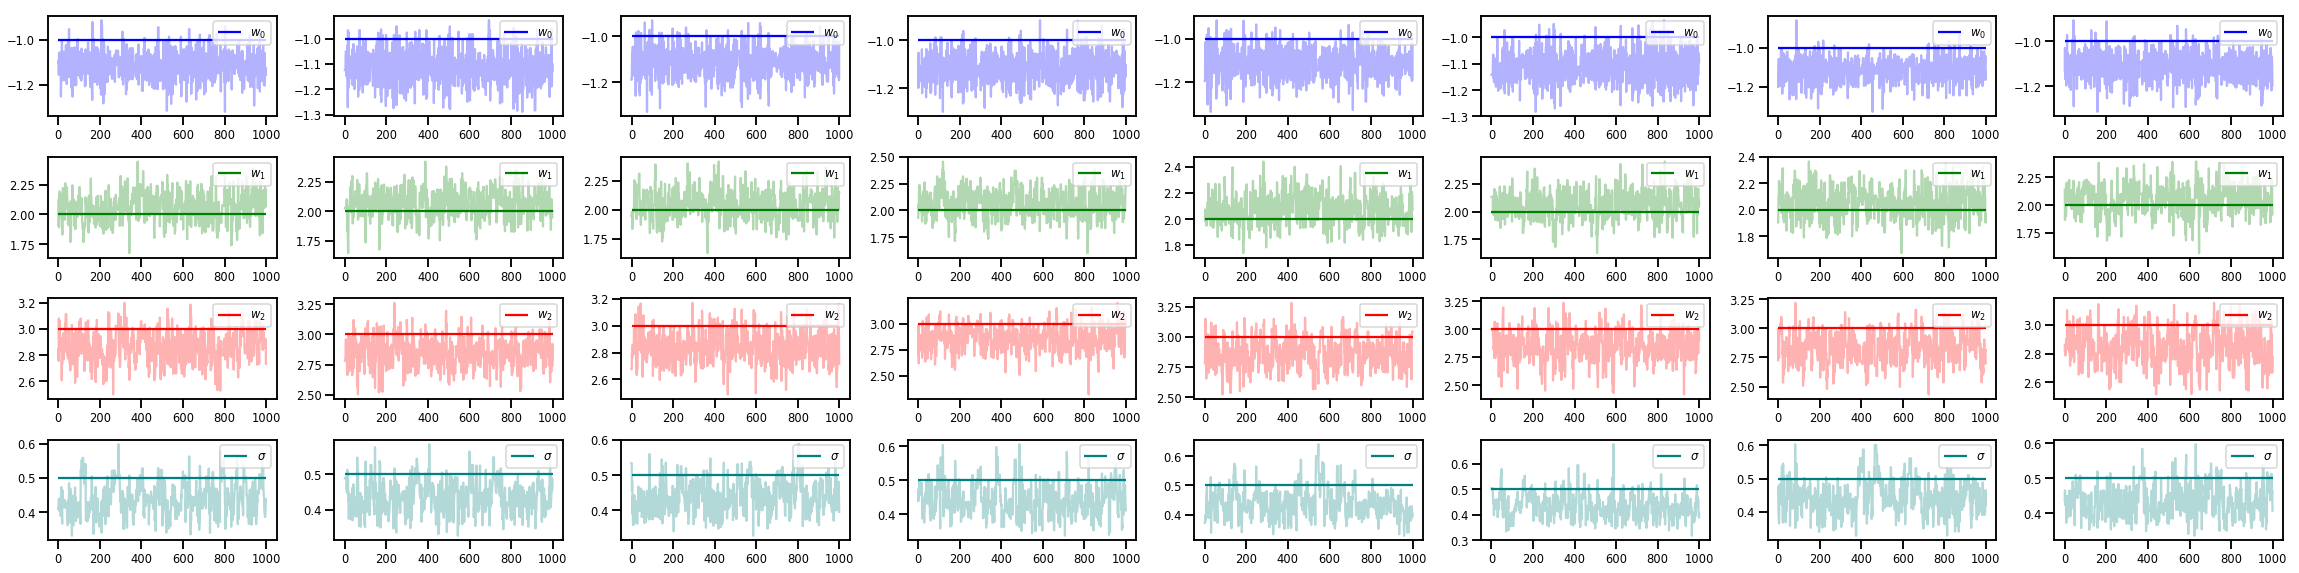

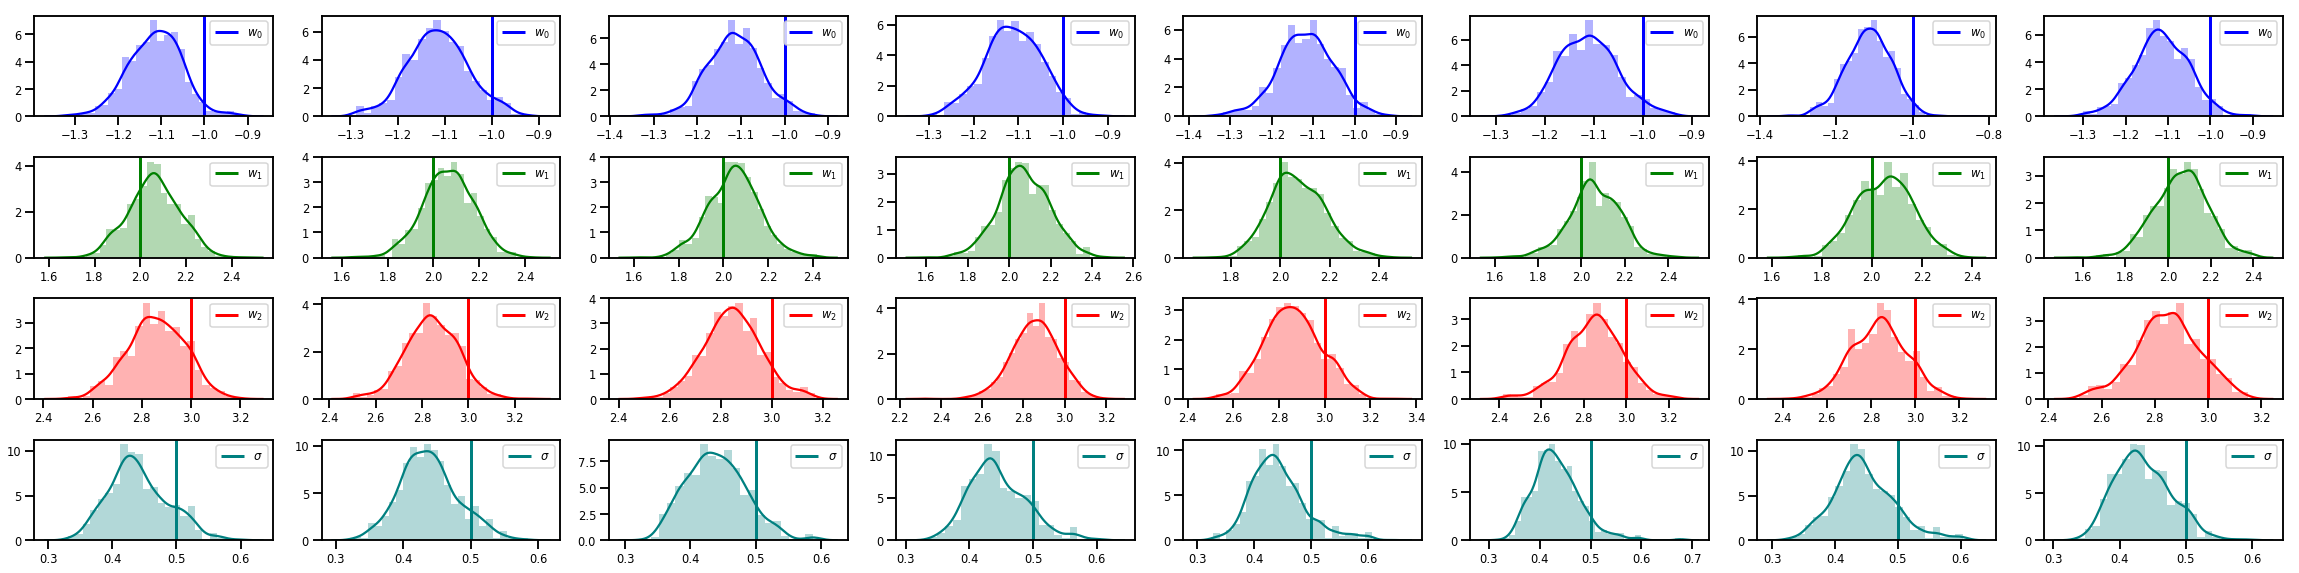

In [ ]:
w_chains, sigma_chains = chains

# Trace plots of w (one of 8 chains)
colors = ['b', 'g', 'r', 'teal']
fig, axes = plt.subplots(4, num_chains, figsize=(4 * num_chains, 8))
for j in range(num_chains):
  for i in range(3):
    ax = axes[i][j]
    ax.plot(w_chains[:, j, i], c=colors[i], alpha=.3)
    ax.hlines(true_w[i], 0, 1000, zorder=4, color=colors[i], label="$w_{}$".format(i))
    ax.legend(loc='upper right')
  ax = axes[3][j]
  ax.plot(sigma_chains[:, j], alpha=.3, c=colors[3])
  ax.hlines(noise_scale, 0, 1000, zorder=4, color=colors[3], label=r"$\sigma$".format(i))
  ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

# Histogram of samples of w
fig, axes = plt.subplots(4, num_chains, figsize=(4 * num_chains, 8))
for j in range(num_chains):
  for i in range(3):
    ax = axes[i][j]
    sns.distplot(w_chains[:, j, i], color=colors[i], norm_hist=True, ax=ax, hist_kws={'alpha': .3})
  for i in range(3):
    ax = axes[i][j]
    ymax = ax.get_ylim()[1]
    ax.vlines(true_w[i], 0, ymax, color=colors[i], label="$w_{}$".format(i), linewidth=3)
    ax.set_ylim(0, ymax)
    ax.legend(loc='upper right')


  ax = axes[3][j]
  sns.distplot(sigma_chains[:, j], color=colors[3], norm_hist=True, ax=ax, hist_kws={'alpha': .3})
  ymax = ax.get_ylim()[1]
  ax.vlines(noise_scale, 0, ymax, color=colors[3], label=r"$\sigma$".format(i), linewidth=3)
  ax.set_ylim(0, ymax)
  ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

## 더 다양한 정보 살펴보기

다음과 같은 다양한 블로그 게시물과 예제를 확인하세요.

- 구조적 시계열 지원 [블로그](https://medium.com/tensorflow/structural-time-series-modeling-in-tensorflow-probability-344edac24083) [Colab](https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand.ipynb)
- 확률적 Keras 레이어(입력: 텐서, 출력: 분포!) [블로그](https://medium.com/tensorflow/regression-with-probabilistic-layers-in-tensorflow-probability-e46ff5d37baf) [Colab](https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb)
    - 다른 레이어 예제: VAE [블로그](https://medium.com/tensorflow/variational-autoencoders-with-tensorflow-probability-layers-d06c658931b7) [Colab](https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_VAE.ipynb)
- 가우시안 프로세스 회귀 [colab](https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Process_Regression_In_TFP.ipynb) 및 잠재 변수 모델링 [colab](https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Process_Latent_Variable_Model.ipynb)

더 많은 예제와 노트가 GitHub([여기](https://github.com/tensorflow/probability/tree/master/tensorflow_probability/examples))에 있습니다.